In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
train_df = pd.read_csv("/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv")
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
test_df = pd.read_csv("/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [6]:
timestamps_per_record = 60
X_train = []
y_train = []

trend_key = 'Volume'

if trend_key == 'Close' or trend_key == 'Volume':
    train_df[trend_key] = train_df[trend_key].map(lambda x: float(x.replace(",","")))

inputs = train_df[trend_key].values
inputs = np.reshape(inputs, (inputs.shape[0],1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
inputs_transformed = sc.fit_transform(inputs)
print(inputs_transformed[:5])
for i in range(60, len(train_df)):
    X_train.append(inputs_transformed[i-60:i,0])
    y_train.append(inputs_transformed[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)


[[0.29525831]
 [0.22993592]
 [0.26361233]
 [0.21617942]
 [0.46779736]]
(1198, 60, 1) (1198,)


In [7]:
lstm_hidden_size = 50
dropout_value = 0.2

model = tf.keras.Sequential([
  tf.keras.layers.LSTM(lstm_hidden_size, return_sequences=True),
  tf.keras.layers.Dropout(dropout_value),
  tf.keras.layers.LSTM(lstm_hidden_size, return_sequences=True),
  tf.keras.layers.Dropout(dropout_value),
  tf.keras.layers.LSTM(lstm_hidden_size, return_sequences=True),
  tf.keras.layers.Dropout(dropout_value),
  tf.keras.layers.LSTM(lstm_hidden_size),
  tf.keras.layers.Dropout(dropout_value),
  tf.keras.layers.Dense(1)
])

In [8]:
model.compile(optimizer="Adam", loss="mse", metrics=["mse"])

In [9]:
batch_size = 32
no_of_epochs = 100
print(X_train.shape, y_train.shape)

model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=no_of_epochs)

(1198, 60, 1) (1198,)
Epoch 1/100
38/38 [==============================] - 9s 17ms/step - loss: 0.0090 - mse: 0.0090
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0045 - mse: 0.0045
Epoch 3/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0056 - mse: 0.0056
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0063 - mse: 0.0063
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0054 - mse: 0.0054
Epoch 6/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0055 - mse: 0.0055
Epoch 7/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0066 - mse: 0.0066
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0052 - mse: 0.0052
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0068 - mse: 0.0068
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0058 - mse: 0.0058
Epoch 11/100
38/38 [=======

In [10]:
if trend_key == 'Volume':
    test_df[trend_key] = test_df[trend_key].map(lambda x: float(x.replace(",","")))

test_inputs = test_df[trend_key].values
test_inputs = np.reshape(test_inputs, (test_inputs.shape[0],1))

test_inputs_transformed = sc.transform(test_inputs)
test_inputs = np.concatenate([inputs_transformed[len(inputs_transformed)-60:], test_inputs_transformed], axis=0)
X_test = []
y_test = []
for i in range(60, len(test_inputs)):
    X_test.append(test_inputs[i-60:i,0])
    y_test.append(test_inputs[i,0])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape, y_test.shape)
    
model.evaluate(x=X_test, y=y_test)


(20, 60, 1) (20,)
1/1 [==============================] - 2s 2s/step - loss: 4.5956e-04 - mse: 4.5956e-04


[0.0004595624632202089, 0.0004595624632202089]

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [12]:
preds = model.predict(X_test)
print(preds)

[[0.06364284]
 [0.05837379]
 [0.04358175]
 [0.0503233 ]
 [0.05831175]
 [0.04917059]
 [0.04622031]
 [0.04291471]
 [0.05003562]
 [0.04303685]
 [0.04923331]
 [0.04707488]
 [0.03708608]
 [0.05723737]
 [0.06367178]
 [0.05223786]
 [0.05305175]
 [0.09340437]
 [0.08904032]
 [0.0982697 ]]


In [13]:
sc.inverse_transform(preds)

array([[1597061.9],
       [1465493.6],
       [1096136.2],
       [1264473. ],
       [1463944.4],
       [1235689.6],
       [1162021.1],
       [1079480.5],
       [1257289.4],
       [1082530.2],
       [1237255.8],
       [1183359.8],
       [ 933939.4],
       [1437117.2],
       [1597784.2],
       [1312279.4],
       [1332602.4],
       [2340207. ],
       [2231237. ],
       [2461694.5]], dtype=float32)

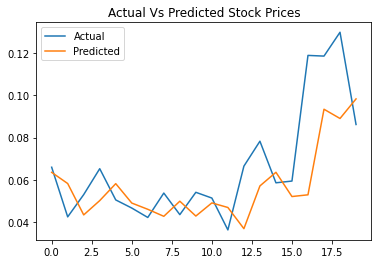

In [14]:
y_test = np.reshape(y_test, (y_test.shape[0]))
preds = np.reshape(preds, (preds.shape[0]))

plt.plot(y_test, label='Actual')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title("Actual Vs Predicted Stock Prices")
plt.show()